## Problem set 6

**Problem 0** (-2 points for every missing green OK sign. If you don't run the cell below, that's -14 points.)

Make sure you are in the DATA1030 environment.

In [19]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.7":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.7":
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.18.5", 'matplotlib': "3.2.2",'sklearn': "0.23.1", 
                'pandas': "1.0.5",'xgboost': "1.1.1", 'shap': "0.35.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.7.6 | packaged by conda-forge | (default, Jun  1 2020, 18:33:30) 
[Clang 9.0.1 ]

[ OK ] numpy version 1.18.5 is installed.
[ OK ] matplotlib version 3.2.2 is installed.
[ OK ] sklearn version 0.23.1 is installed.
[ OK ] pandas version 1.0.5 is installed.
[ OK ] xgboost version 1.1.1 is installed.
[ OK ] shap version 0.35.0 is installed.


**Problem 1a** (3 points)

Please load true_labels_pred_probs.csv in the data folder into a data frame. It contains the true labels and the predicted probabilities of class 0 and 1 in a classification problem.

Please prepare the predicted classes for a critical probability of 50% and visualize the confusion matrix.

In [20]:
# this is just copy-paste from the lecture note

import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Index(['y_true', 'pred_prob_class0', 'pred_prob_class1'], dtype='object')
Confusion matrix, without normalization


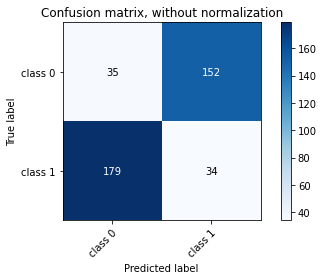

In [25]:
from sklearn.metrics import confusion_matrix

df = pd.read_csv('data/true_labels_pred_probs.csv')
print(df.columns)
y_true = df['y_true'].values
pred_proba = df['pred_prob_class0'].values

y_pred = np.zeros(len(pred_proba),dtype=int)
y_pred[pred_proba < 0.5] = 0
y_pred[pred_proba >= 0.5] = 1

plot_confusion_matrix(y_true,y_pred,classes=['class 0', 'class 1'])
plt.show()


**Problem 1b** (9 points)

Calculate and plot the accuracy, precision, recall, f0.5, f1, f1.5 scores using the sorted predicted proabilities as critical probabilities!

What critical probability maximizes the scores (one critical probability per score)? 

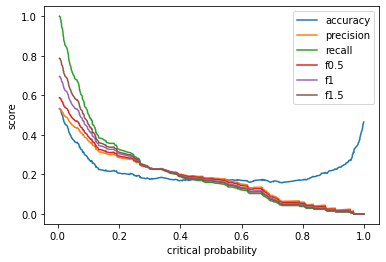

0.005476633082646343
0.005476633082646343
0.005476633082646343
0.005476633082646343
0.005476633082646343
0.005476633082646343


In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

p_crits = np.sort(pred_proba)

acc = np.zeros(len(p_crits))
p = np.zeros(len(p_crits))
r = np.zeros(len(p_crits))
f05 = np.zeros(len(p_crits))
f1 = np.zeros(len(p_crits))
f15 = np.zeros(len(p_crits))

for i in range(len(p_crits)):
    p_crit = p_crits[i]
    y_pred[pred_proba < p_crit] = 0
    y_pred[pred_proba >= p_crit] = 1
    
    acc[i] = accuracy_score(y_true,y_pred)
    p[i] = precision_score(y_true,y_pred)
    r[i] = recall_score(y_true,y_pred)
    f05[i] = fbeta_score(y_true,y_pred,beta = 0.5) 
    f1[i] = fbeta_score(y_true,y_pred,beta = 1) 
    f15[i] = fbeta_score(y_true,y_pred,beta = 1.5) 


plt.plot(p_crits,acc,label='accuracy')
plt.plot(p_crits,p,label='precision')
plt.plot(p_crits,r,label='recall')
plt.plot(p_crits,f05,label='f0.5')
plt.plot(p_crits,f1,label='f1')
plt.plot(p_crits,f15,label='f1.5')
plt.legend()
plt.xlabel('critical probability')
plt.ylabel('score')
plt.show()

print(p_crits[np.argmax(acc)])
print(p_crits[np.argmax(p)])
print(p_crits[np.argmax(r)])
print(p_crits[np.argmax(f05)])
print(p_crits[np.argmax(f1)])
print(p_crits[np.argmax(f15)])

**Problem 1c** (3 points)

One of the curves is monotone increasing and another curve is monotone decreasing. Which evaluation metrics correspond to these two curves and why is this a problem when you try to tune the critical probability? Explain your answer in a few sentences.


**Problem 2a** (6 points)

Work with true_labels_pred_probs.csv again. 

Calculate the points on the ROC curve and plot it. 

Print what is the best critical probability by finding the point on the ROC curve that's closest to the perfect classifier (0,1) point. 

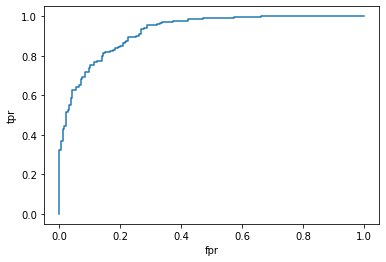

0.5967301685054103


In [5]:
import pandas as pd
from sklearn.metrics import roc_curve
from matplotlib.pylab import plt
import numpy as np

df = pd.read_csv('data/true_labels_pred_probs.csv')

# 1 point for using the class 1 predicted probabilities
# 1 point for correctly calculating the fpr and tpr points (roc_curve is one option, they can also manually calculate the points)
fpr, tpr, p_crits = roc_curve(df['y_true'],df['pred_prob_class1']) 

# 1 point if plot is correct and the x and y labels are there
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

# distance calculation
distance = np.zeros(len(fpr))
for i in range(len(fpr)):
    distance[i] = np.sqrt( (fpr[i])**2 + (tpr[i] - 1)**2 ) # 3 points for the correct distances
    
print(p_crits[np.argmin(distance)]) # 2 points for correctly determining the best p_crit


**Problem 2b** (9 points)

We discussed in class that the baseline accuracy of a classification model is equal to the fraction of points that belong to the most populous class. For example, if 80% of points belong to class 0 and 20% of points belong to class 1, we could predict class 0 to all points and the accuracy of our model would be 80%. Keep this concept and methodology in mind and answer the questions below.

Q1: How would you calculate the baseline f1 score in classification? Let's assume $n_0$ points are in class 0 and $n_1 = n - n_0$ points are in class 1 where $n$ is the number of points in your dataset. Work out the solution on pen and paper. Express the f1 score using $p$ and $r$.

p = tp/(tp+fp)

r = tp/(tp+fn)

f1 = 2pr/(p+r)

If all points are predicted to be class 0, fp = tp = 0 and precision is undefined (0/0). The good way to go is to predict all points to be class 1. Then tp = n1/n, fp = n0/n, fn = 0. Let's add these to the equations of p and r:

p = n1/n / (n1/n + n0/n) = n1 / (n1 + n0) = n1/n

r = n1/n / (n1/n + 0) = 1

Finally, the f1 score becomes

f1 = 2 n1/n 1 / (n1/n + 1) = 2 p / (p + 1)

Q2: Generalize your Q1 solution to the f_beta score. Usually the f_beta score is used when the classification problem is imbalanced. Prepare a figure which shows the baseline f_beta score for beta = 0.5, 1, and 2 when the fraction of points that belong to class 0 is between 0.95 and 1. Use 51 linearly spaced values between 0.95 and 1.
Create a plot with three curves, one curve per beta value. Don't forget to add axes labels and a legend.

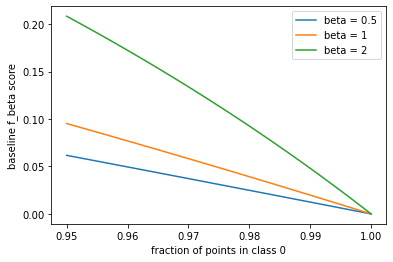

In [18]:
# f_beta = (1 + beta^2)pr/(beta^2*p + r)
# in our case f_beta = (1 + beta^2)p/(beta^2*p + 1)
# balance = n0/n but p = n1/n = 1 - balance

balance = np.linspace(0.95, 1.0, 51) # balance is >= 0.5 and smaller than 1
beta = [0.5,1,2]

baseline_f_beta = np.zeros([len(balance),len(beta)])

for b in range(len(balance)):
    for bb in range(len(beta)):
        p = 1 - balance[b]
        baseline_f_beta[b,bb] = (1 + beta[bb]**2)*p/(beta[bb]**2*p + 1)

plt.plot(balance,baseline_f_beta[:,0],label='beta = 0.5')
plt.plot(balance,baseline_f_beta[:,1],label='beta = 1')
plt.plot(balance,baseline_f_beta[:,2],label='beta = 2')
plt.xlabel('fraction of points in class 0')
plt.ylabel('baseline f_beta score')
plt.legend()
plt.show()